# **Fitness patterns and perfofmance analysis**

## Objectives of the Project

- Classify gym members into **fitness levels** (Low, Medium, High) based on their biometric and workout behavior.
- Understand the **key drivers** of calorie burn and fitness level (e.g., BMI, heart rate, session duration).
- Build a model that supports **personalized fitness guidance** and **member segmentation**.
- Communicate insights visually for stakeholders using feature importance and performance metrics.

## Inputs
In this Notebook Explanotory Data Analysis (EDA), Vizualisation Analysis and ML model are performed on the "Gym Members Exercise Dataset" data set [Kaggle](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset/data). 
Dataset cointains the following columns:
* Age: Age of the gym member.
* Gender: Gender of the gym member (Male or Female).
* Weight (kg): Member’s weight in kilograms.
* Height (m): Member’s height in meters.
* Max_BPM: Maximum heart rate (beats per minute) during workout sessions.
* Avg_BPM: Average heart rate during workout sessions.
* Resting_BPM: Heart rate at rest before workout.
* Session_Duration (hours): Duration of each workout session in hours.
* Calories_Burned: Total calories burned during each session.
* Workout_Type: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
* Fat_Percentage: Body fat percentage of the member.
* Water_Intake (liters): Daily water intake during workouts.
* Workout_Frequency (days/week): Number of workout sessions per week.
* Experience_Level: Level of experience, from beginner (1) to expert (3).
* BMI: Body Mass Index, calculated from height and weight.

The dataset was enreached with simulated records for low fitness records. Snippet for data records generation and dataset merge can be found here [link]()

## Outputs
**FitnessLevel** (Target Variable):  
  * `"Low"`: Low effort or irregular activity  
  * `"Medium"`: Moderate consistency and calorie burn  
  * `"High"`: High engagement and performance  

**Exploratory Data Analysis (EDA)**:  
  * Descriptive statistics  
  * Correlation heatmaps  
  * Pairplots  
  * Fitness level distributions  
  * Other performance-related insights via plots  

**Machine Learning Model Output**:  
  * Trained classification model predicting fitness level  
  * Evaluation metrics: Accuracy, Classification Report, Confusion Matrix  
  * Feature importance plot to highlight influential variables





---

For this project different Python librarires are used for analysis and vizualisation. Libraries are imported prior furtherwork on the project.

In [1]:
import pandas as pd                 #import Pandas for data manipulation
import numpy as np                  #import Numpy for numerical operations
import matplotlib.pyplot as plt     #import Matplotlib for data visualization
import seaborn as sns               #import Seaborn for statistical data visualization
from plotly.subplots import make_subplots  #import Plotly subplots for creating complex figures
import plotly.express as px         #import Plotly Express for interactive visualizations
from sklearn.model_selection import train_test_split #import train_test_split for splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler #import LabelEncoder and StandardScaler for data preprocessing   
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier for classification tasks
from sklearn.metrics import classification_report, confusion_matrix   #import metrics for model evaluation
from sklearn.utils import resample                  #import RandomForestClassifier for classification tasks
from sklearn.metrics import classification_report, confusion_matrix    #import metrics for model evaluation

Stylw and plot size

In [2]:
sns.set_style("whitegrid")      #set Seaborn style to whitegrid for better aesthetics
plt.rcParams['figure.figsize'] = (12, 6)    #set default figure size for Matplotlib plots

# 1. Explanotary Data Analysis

##### In this section EDA, including ETL (Extract, Transform, Load) and initial data visualizations, is performed.

As a first step, "gym_members_exercise_tracking.csv" data set is loaded into DataFrame (further dataFrame or df)

In [3]:
df = pd.read_csv('../data/gym_members_exercise_tracking_with_low_calories.csv')  # Load the car price dataset
df.head()                                            # Display the first few rows of the dataset

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


##### ***1.1 ETL***

In section initial data inspection, preparation and load are performed

Here the shape, Info and column types of the uploaded dataset are shown

In [4]:
print(df.shape)                     # Print the shape of the DataFrame           
print(df.info())                    # Print concise summary of the DataFrame            
print(df.dtypes)                    # Print data types of each column

(1073, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1073 non-null   int64  
 1   Gender                         1073 non-null   object 
 2   Weight (kg)                    1073 non-null   float64
 3   Height (m)                     1073 non-null   float64
 4   Max_BPM                        1073 non-null   int64  
 5   Avg_BPM                        1073 non-null   int64  
 6   Resting_BPM                    1073 non-null   int64  
 7   Session_Duration (hours)       1073 non-null   float64
 8   Calories_Burned                1073 non-null   float64
 9   Workout_Type                   1073 non-null   object 
 10  Fat_Percentage                 1073 non-null   float64
 11  Water_Intake (liters)          1073 non-null   float64
 12  Workout_Frequency (days/week)  1073 n

As it shown, DataFrame consists of 973 etries and 15 columns with following types:
* float64 - 7
* Int64 - 6
* object - 2

In the next steps df is checked for any inconsistencies (duplicates, missing values and etc.)

In [5]:
df.isnull().sum()                 # Check for missing values in each column

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

as it shown above the df has no missing values. Let's check for duplicates:

In [6]:
df.duplicated()# Check for duplicate rows in the DataFrame


0       False
1       False
2       False
3       False
4       False
        ...  
1068    False
1069    False
1070    False
1071    False
1072    False
Length: 1073, dtype: bool

And there are no duplicates. Initial data inspection shows that df has no missing values and duplicates, which simplifies further work with the dataset.

Fetching all columns names

In [7]:
df.columns          # Display the column names of the DataFrame

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

 As it is well known, BMI(Body Mass Index) is calculated as: Weight(kg)/(Height(m)**2). For further analysis columns "Weight(kg)" and "Height(m)" can be dropped, because dataset already contains more informative column "BMI".

In [8]:
df.drop(columns=['Weight (kg)', 'Height (m)'], inplace=True)  # Drop 'Weight(kg)' and 'Height(m)' columns as BMI is already present

Let's check wich unique names have object columns "Gender" and "Workout_Type"

In [9]:
print(df["Gender"].unique())# Check unique values in "Gender" column
print(df["Workout_Type"].unique()) # Check unique values in "Workout_Type" column

['Male' 'Female']
['Yoga' 'HIIT' 'Cardio' 'Strength']


For further visualizations and classification it is necessary to create new variable "Fitness_Level" based on how much person burns calories during trainings. More calories burned, higher fitness level person has.

In [10]:
# Create fitness classification based on calories burned
def classify_fitness(calories):
    if calories < 300:
        return "Low"
    elif calories < 600:
        return "Medium"
    else:
        return "High"

df["Fitness_Level"] = df["Calories_Burned"].apply(classify_fitness)  # Apply the classification function to create a new column

Below counts of each unique category names of the "Fitness_Level" column are displayed

In [11]:
print(df["Fitness_Level"].unique())# Display the unique names of each fitness level category
print(df["Fitness_Level"].value_counts()) # Display the counts of each fitness level category 

['High' 'Medium' 'Low']
Fitness_Level
High      841
Medium    132
Low       100
Name: count, dtype: int64


As it shown below, "Fitness_Level" contains only 2 unique categories: "High" and "Medium", 841 and 132 counts, respectively, which corresponds to amount of entries of the dataset

`For a Data Visualization part of the project, it is not necessary to encode categorical variables, namely "Gender" and "Workout_Type". For simplicity, it will be done directly in Maschine Learning Model part.`

Next step is to take a look on a descriptive statistic summary for each column in the df. This summary includes following metrics:
* count: Number of non-missing (non-NaN) values. Helps check missing data.
* mean:	Average (sum / count). Central tendency of numeric data.
* std: Standard deviation. How spread out the values are from the mean.
* min: Minimum value. The smallest observed value.
* 25%: 25th percentile (Q1). 25% of data is below this value
* 50% (median): 50th percentile. Half the data is below this value.
* 75%: 75th percentile (Q3). 75% of data is below this value
* max: Maximum value. The largest observed value

In following cell a descriptive statistics of numeric columns is performed:

In [12]:
df.describe() # Generate descriptive statistics of numerical columns

,Age,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
mean,38.611370,179.389562,142.469711,61.758621,1.208816,844.191985,25.443243,2.566011,3.248835,1.778192,24.967614
std,12.180887,11.441169,14.346566,7.244174,0.361716,322.484783,6.192844,0.608490,0.911453,0.727402,6.542684
min,18.000000,160.000000,120.000000,50.000000,0.500000,200.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,170.000000,130.000000,55.000000,0.970000,656.000000,21.700000,2.100000,3.000000,1.000000,20.280000
50%,39.000000,180.000000,140.000000,62.000000,1.210000,868.000000,26.700000,2.500000,3.000000,2.000000,24.220000
75%,49.000000,189.000000,155.000000,68.000000,1.420000,1053.000000,29.700000,3.000000,4.000000,2.000000,28.680000
max,59.000000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


Key Insights:
* Age:
    * Members range from 18 to 59 years old.
    * Median age is 40, with most users between 28 and 49 – indicating a predominantly adult fitness population. 
* Heart Rate Data (BPM):
    * Max_BPM ranges from 160 to 199 bpm.
    * Avg_BPM ~144, Resting_BPM ~62.
    * Most users fall within expected cardiovascular performance zones.
* Session Duration & Calories Burned:
    * Sessions vary from 0.5 to 2 hours.
    * Calories burned range from 303 to 1783 kcal, with a median around 893 — good spread for modeling fitness level.
* Fat % & Water Intake:
    * Fat percentage from 10% to 35%
    * Water intake between 1.5–3.7L — indicating hydration is being monitored.
* Workout Frequency & Experience:
    * Most work out 2–5 times/week.
    * Experience Level ranges from 1 to 3 (Beginner to Advanced).
* BMI
    * Median BMI is ~24.16; 25% of users are above ~28.6 — showing potential overweight group.

Conclusion:
The dataset captures a diverse, balanced gym population, covering all experience levels and health profiles. It's well-suited for classification and clustering tasks, with rich features for meaningful dashboards and insight generation.


---

At this stage of the project dataset inspection and preparation are over. Therefore, dataset can be saved into dedicated GitHub repository for further use in Tableau or PowerBi.

In [13]:
df.to_csv('../data/cleaned_gym_members_exercise_tracking.csv', index=False)

---

##### ***1.2 Initial Data Visiaulization***

##### 1.2.1 Pairplot of Key Numeric Variables

A pairplot is a scatterplot matrix that visualizes pairwise relationships and the distribution of each variable. Diagonal shows histogram/KDE plot of each feature, off-diagonal shows scatterplots for each pair of variables. 
Pairplots show actual data points and possible non-linear relationships, clusters, and outliers, help you visually assess relationships before calculating stats.

In the cell below a pairplot for key numeric variables, such as BMI, Calories_Burned and etc, is shown.

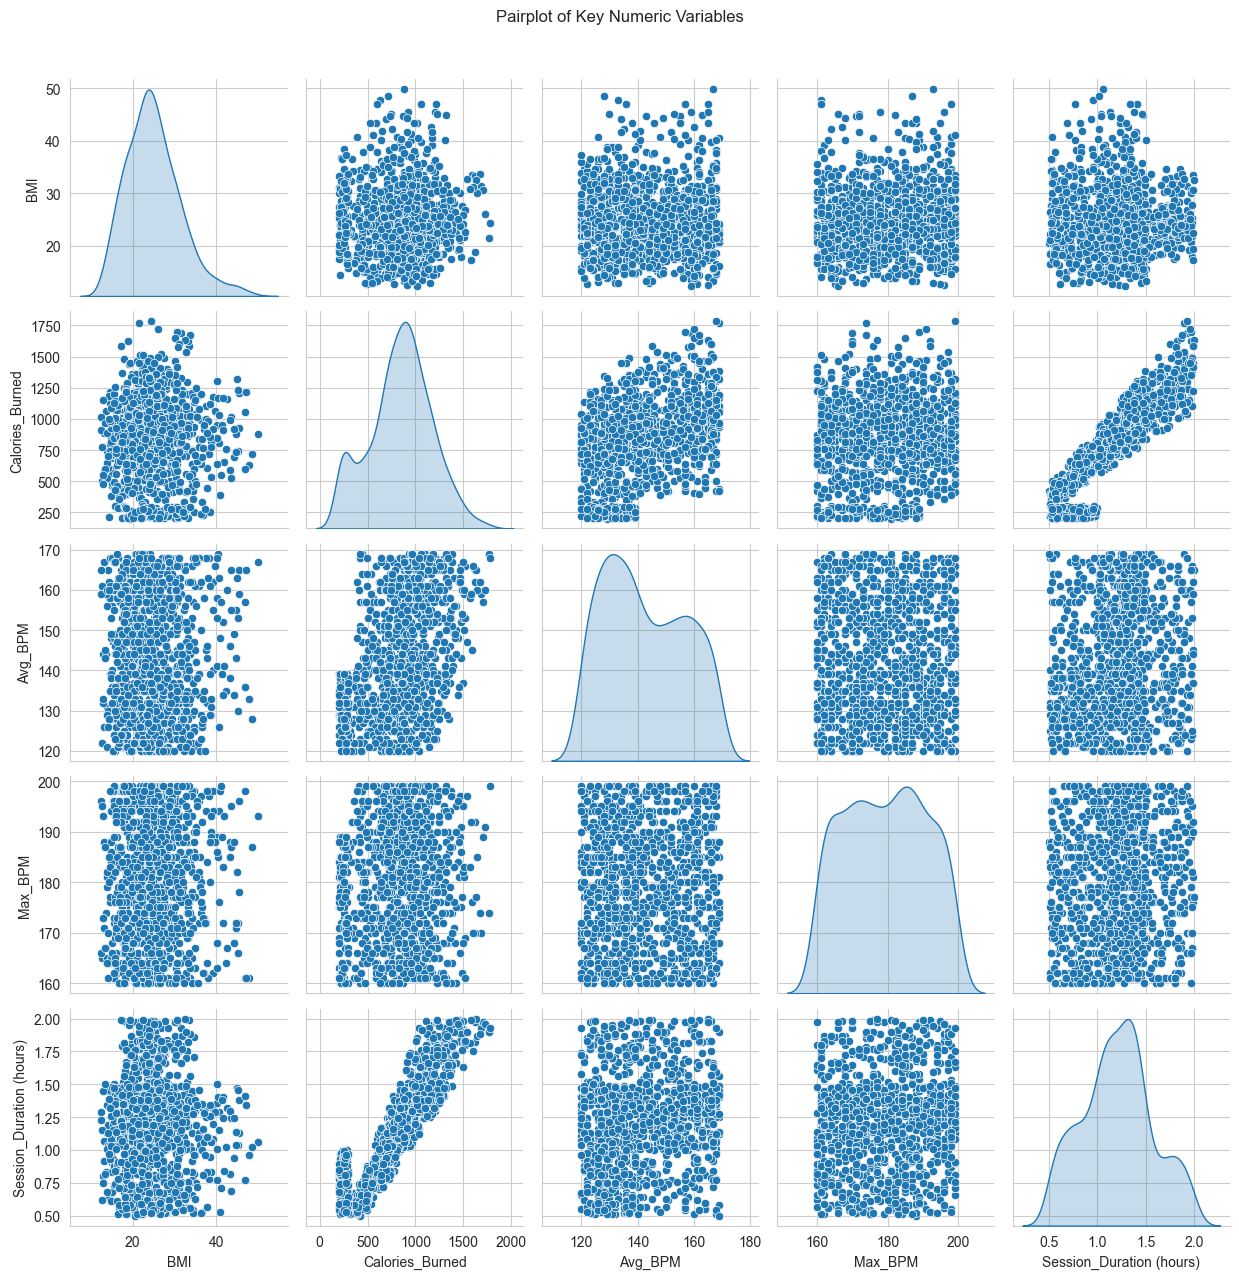

In [14]:
sns.pairplot(df[["BMI", "Calories_Burned", "Avg_BPM", "Max_BPM", "Session_Duration (hours)"]], diag_kind='kde')
plt.suptitle("Pairplot of Key Numeric Variables", y=1.02)
plt.tight_layout()
plt.show()

Key Insights from the Pairplot:
* Strong Linear Relationship: 
    * Calories_Burned vs. Session_Duration (hours) shows a clear strong positive linear correlation. This is expected — longer workout sessions burn more calories.
* Distribution Observations:
    * BMI is normally distributed but slightly right-skewed, peaking around 22–25.
    * Session_Duration and Calories_Burned also show relatively bell-shaped distributions, but with some outliers.
    * Heart Rate metrics (Avg_BPM, Max_BPM) are bimodal or flat, suggesting different workout intensity groups.
* No Clear Patterns:
    * BMI, Avg_BPM, Max_BPM show no obvious linear correlation with calories burned or session duration — these relationships might be non-linear or influenced by other factors.
    * Heart rate features do not seem tightly correlated with BMI or Calories_Burned, indicating individualized heart response.
* Clusters & Spread:
    * Scattered patterns in most off-diagonal plots imply weak or no correlation among many pairs.
    * Could indicate high variability in member profiles or missing group-specific coloring (e.g., by fitness level or gender).

##### 1.2.2 Correlation Heatmap

A correlation heatmap is a summary of how strongly pairs of numerical variables are related to each other, using Pearson correlation coefficients.
* Values range from -1 to 1:
    * +1 = Perfect positive linear relationship (as one increases, so does the other)
    * -1 = Perfect negative linear relationship (as one increases, the other decreases)
    * 0 = No linear relationship

* It's visualized as a colored grid (typically red–blue or green–purple):
    * Dark red (or blue) = strong positive (or negative) correlation
    * White or neutral = weak/no correlation

In the cell below a heatmap for numeric variables is shown.

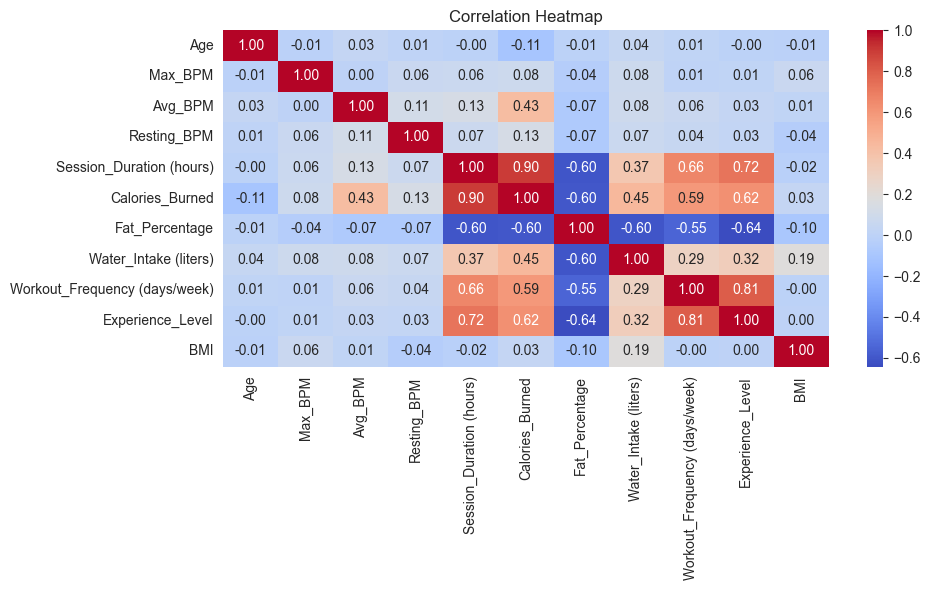

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Key Insights from the Correlation Heatmap
* Strong Positive Correlations
    * Session_Duration and Calories_Burned: +0.91. Longer workout sessions clearly burn more calories.
    * Experience_Level and Workout_Frequency: +0.84. More experienced users tend to work out more frequently.
    * Experience_Level and Session_Duration: +0.76. More experienced users also tend to have longer sessions.
    * Calories_Burned and Workout_Frequency: +0.58. People who work out more often burn more calories.
* Moderate Correlations
    * Calories_Burned and Avg_BPM: +0.34. Higher average heart rate is moderately linked to more calories burned.
    * Session_Duration and Avg_BPM: +0.34. Longer sessions slightly increase average BPM.
    * Calories_Burned ↔ Water_Intake: +0.36. More hydration is moderately tied to higher calorie burn.
* Negative Correlations
    * Fat_Percentage is negatively correlated with:
        * Workout_Frequency: -0.65
        * Experience_Level: -0.60
        * Session_Duration: -0.58
        * Calories_Burned: -0.58
    Fitter, more experienced users have lower body fat percentages.
* Weak or No Correlation
    * Age, Max_BPM, Resting_BPM, BMI show minimal or no strong linear correlation with other variables.


Workout behavior (frequency, duration, experience) has the strongest influence on health metrics like calories burned and fat percentage. Fat percentage decreases with more consistent and longer workouts.
Heart rate data is not strongly linearly correlated with most other variables, which may require deeper time-series or cluster analysis.

##### 1.2.2 Distribution of the Target Variable "Fitness_Level"

The Fitness Level Distribution plot shows how many users fall into each fitness category (Beginner, Intermediate, Advanced). It helps identify class imbalance for model training and provides quick business insight into the dominant user group.


In the cell the distribution of the target variable "Fitness_Level" is shown.

C:\Users\julia\AppData\Local\Temp\ipykernel_30180\1612588328.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fitness_Level', palette='coolwarm')


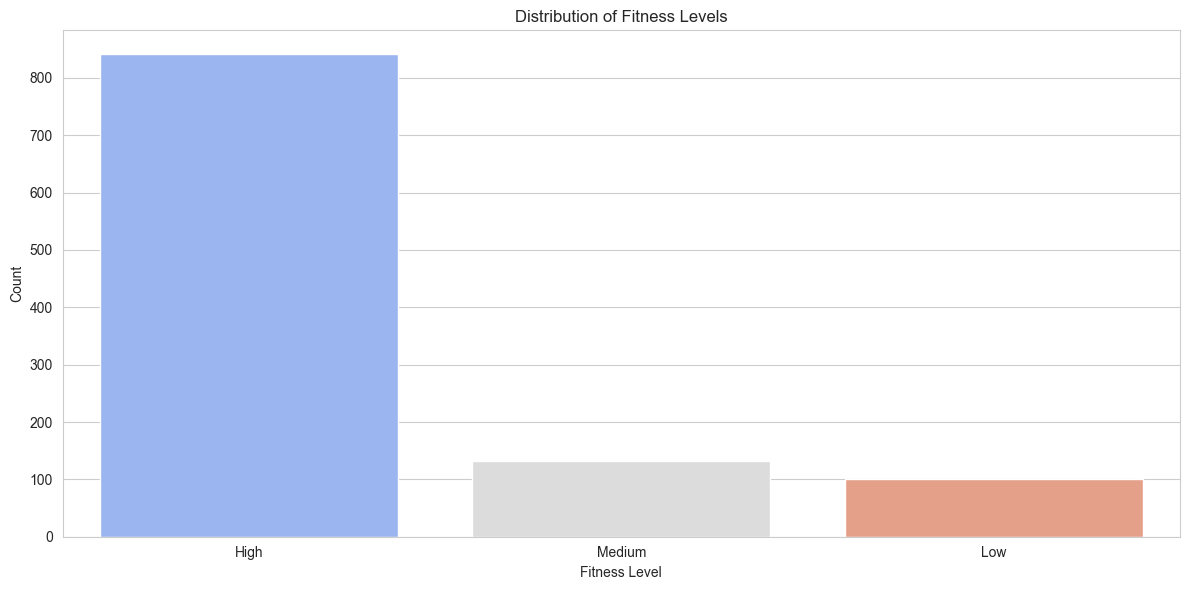

In [16]:
sns.countplot(data=df, x='Fitness_Level', palette='coolwarm')
plt.title('Distribution of Fitness Levels')
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The majority of users fall into the **High** fitness level category, with significantly fewer in the **Medium** group. This class imbalance is important for **model training** and may require techniques like **resampling** or **weighted classification**.


## Conclusion

The ETL process successfully cleaned and prepared the fitness dataset, enabling efficient analysis. Basic visualizations such as the pairplot and correlation heatmap uncovered key relationships between variables—for example, strong positive correlations between session duration, calories burned, and experience level. The fitness level distribution plot revealed a significant class imbalance, with most users classified as having high fitness levels. These foundational insights helped guide feature selection and informed our later modeling and advanced visualization efforts.

---

# 2. Advanced Data Visualization

In the Advanced Visualization section of the project, we explore complex relationships between multiple features using insightful plots like box plots, scatter plots, bubble charts, and an alluvial diagram. These visuals go beyond basic EDA by uncovering interactions between categories, identifying performance trends, and highlighting hidden patterns in fitness behavior. This enables deeper understanding of how factors like experience level, hydration, and workout type influence fitness outcomes.

##### ***2.1 Box Plot: Calories Burned vs Experience Level***

This plot helps assess whether experience level (1-3, where 1 is beginner, 3 is experienced) correlates with training output, measured by calories burned. It supports hypothesis generation for modeling and allows visual validation of patterns across user segments.

C:\Users\julia\AppData\Local\Temp\ipykernel_30180\2836367280.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned', palette='Set2')


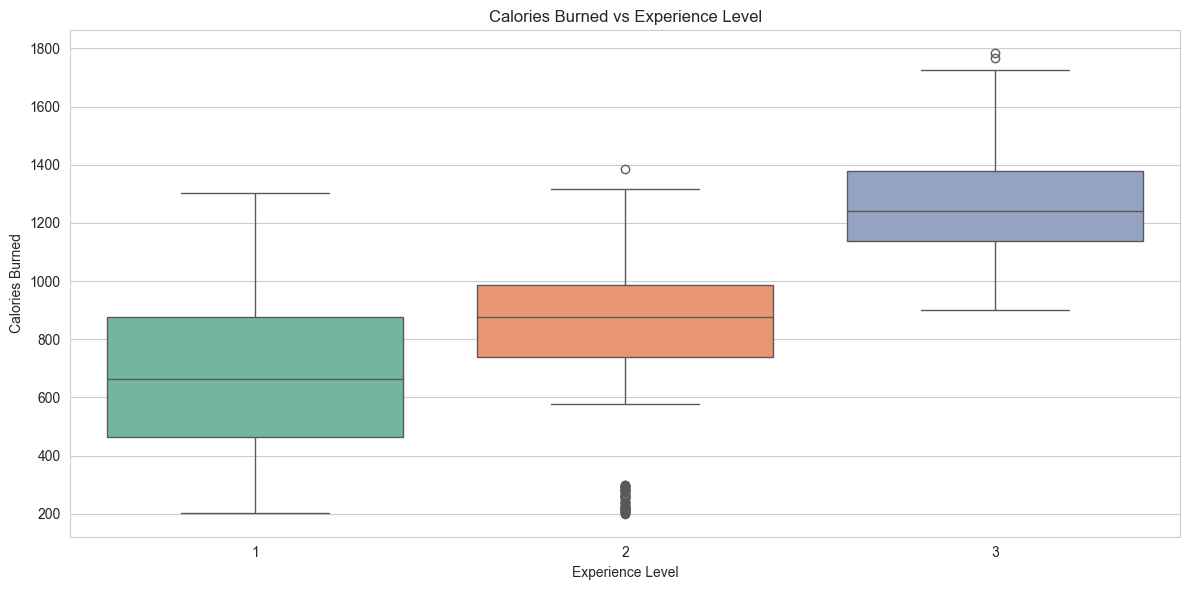

In [17]:
sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned', palette='Set2')
plt.title('Calories Burned vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Calories Burned')
plt.tight_layout()
plt.show()

Key Insights:
* More experienced individuals (Level 3) consistently burn more calories than beginners (Level 1), with higher median and upper range values.
* There is a clear upward trend in calories burned with increasing experience.
* A few outliers appear, especially in Level 2 and 3, showing variation in training intensity or duration.

##### ***2.2 Scatter Plot: Age vs Calories Burned***

This plot helps visually explore whether age influences fitness output. Since no strong trend appears, it suggests age is not a primary predictor of calories burned and should be analyzed alongside other variables like experience level, session duration, or workout type.

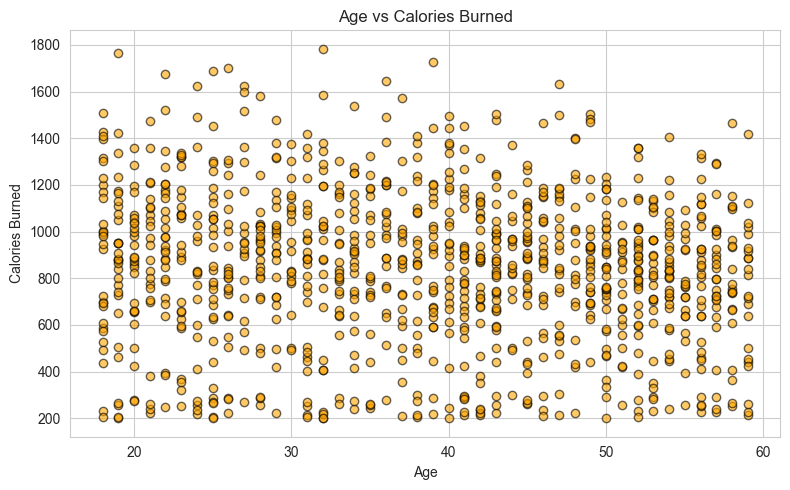

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['Calories_Burned'], alpha=0.6, c='orange', edgecolors='black')
plt.title('Age vs Calories Burned')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.tight_layout()
plt.show()

Key Insights:
* There is no clear linear relationship between age and calories burned — participants across all ages (18–59) show a wide spread of calorie expenditure.
* Younger and older individuals can both achieve high and low calorie burns, suggesting factors like session intensity, duration, or experience matter more than age alone.

##### ***2.3 Scatter Plot: Hydration vs Fat % by Fitness Level***

This plot highlights the inverse relationship between hydration and body fat, segmented by fitness level. It supports the hypothesis that proper hydration is associated with better body composition and fitness outcomes.

In [19]:
fig = px.scatter(df,
                 x="Water_Intake (liters)",
                 y="Fat_Percentage",
                 size="Calories_Burned",
                 color="Fitness_Level",
                 hover_data=["Age", "Gender"],
                 title="Hydration vs Fat % by Fitness Level")
fig.show()

Key Insights:
* Individuals with higher water intake generally show a lower fat percentage, especially in the high fitness level group (blue dots).
* High fitness level participants tend to cluster around higher hydration and lower fat zones, while medium fitness levels (red dots) appear more spread out and skewed toward higher fat percentages.

##### ***2.4 Alluvial Diagram: Category Relationships – Gender, Experience, Workout Type & Fitness Level***

This alluvial (Sankey-style) diagram helps visualize the flow and interconnection between categorical features—gender, experience level, workout type, and resulting fitness level. It reveals how these variables interact to shape health outcomes, enabling pattern recognition across user demographics and behaviors.

In [20]:
fig = px.parallel_categories(df,
                             dimensions=["Gender", "Experience_Level", "Workout_Type", "Fitness_Level"],
                             color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title="Category Relationships")
fig.show()

Key Insights:
* High fitness levels are most common among individuals with higher experience levels (especially level 3).
* Strength and HIIT training are frequent among highly experienced participants who often achieve high fitness levels.
* Both males and females are well represented across all fitness levels, though males slightly dominate in the highest experience bracket.

### Conclusion

The advanced visualizations revealed clear and actionable insights: individuals with higher experience levels burn significantly more calories, increased water intake is linked to lower body fat percentages, and different workout types correlate with distinct fitness outcomes. The alluvial diagram effectively illustrated how gender, experience, and workout preferences together shape fitness levels. These findings deepen our understanding of user behavior and support data-driven decision-making in fitness planning and member segmentation.

---

# 3. Machine Learning - Fitness Level Clasification

In this part of the project, we aim to build a machine learning model that can classify gym members into fitness levels (Low, Medium, High) based on their physiological data, exercise habits, and workout metrics. By leveraging key features such as age, BMI, heart rates, session duration, and workout frequency, we seek to uncover patterns that help predict overall fitness.

To ensure fair and accurate predictions, we first addressed class imbalance using resampling techniques and then trained a Random Forest Classifier, chosen for its robustness, ability to handle mixed data types, and interpretability through feature importance analysis.

This model can help fitness centers better understand member performance, personalize training programs, and guide data-driven decision-making in health and wellness initiatives.

##### ***3.1 Background and Motivation***

Random Forest Classifier was chosen as ML model by following reasons:
* It handles a mix of numerical and categorical features well (after encoding).
+ It is relatively robust to outliers and non‐linear relationships, which are likely in this exercise dataset (e.g., BMI, heart rates, water intake).
* It provides feature importance, which helps explain what features drive the fitness‐level prediction — useful for business insight and stakeholder communication.
* The class‐balance step (up‐sampling the minority classes) helps avoid model bias toward the dominant class (which the EDA earlier had shown might be an issue).
* Stratified train/test split ensures that each fitness level is represented fairly in both training and test sets.
* Scaling (StandardScaler) is applied to ensure that features like “Session Duration”, “Water Intake”, etc., are on the same scale, benefiting the model.

##### ***3.2 Model Building***

As it was shown in ETL part of this project, dataset contains two categorical variablebles, namely "Gender" and "Workout_Type". For our Model it is necessary to encode these variables for further processing

In [21]:
#Encode and Prepare Features
le_gender = LabelEncoder()                                  #Initialize LabelEncoder
df["Gender_enc"] = le_gender.fit_transform(df["Gender"])    #Encode "Gender" column

le_workout = LabelEncoder()                                 #Initialize LabelEncoder for Workout_Type   
df["WorkoutType_enc"] = le_workout.fit_transform(df["Workout_Type"])  #Encode "Workout_Type" column 

Features that are most relevant for predicting fitness level, including physiological metrics (age, BMI), heart rate indicators, hydration, workout frequency, and experience level.

Our target variable is the Fitness_Level column.

In [22]:

# Select features & target
features = [
    "Age", "Gender_enc", "BMI",
    "Max_BPM", "Avg_BPM", "Resting_BPM",
    "Session_Duration (hours)", "Water_Intake (liters)",
    "Workout_Frequency (days/week)", "Experience_Level",
    "WorkoutType_enc", "Fat_Percentage"
]
X = df[features]
y = df["Fitness_Level"]

As it was shown in initial data visualization chapter of this project, "Fitness_Level" distribution was imbalanced. Up-sampling is used to balance the dataset by resampling the minority classes to match the size of the majority class. This ensures that the model doesn’t bias toward the dominant class.

In [23]:
# Check class balance again
print("Class distribution:\n", y.value_counts())

Class distribution:
 Fitness_Level
High      841
Medium    132
Low       100
Name: count, dtype: int64


In [24]:
 # Handle class imbalance
df_majority = df[y == "High"]                     # Majority class  
df_minority = df[y != "High"]                     # Minority class

df_min_up = resample(                             # Upsample minority class         
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

df_balanced = pd.concat([df_majority, df_min_up])  # Combine majority class with upsampled minority class
X_bal = df_balanced[features]                      # Features after balancing
y_bal = df_balanced["Fitness_Level"]                # Target after balancing 


We split the balanced dataset into training and testing sets (80/20 split) and apply StandardScaler to normalize the feature values.
Scaling ensures features like weight and session duration are on the same scale, improving model performance.

In [25]:
# Train/test split and scaling
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train the Random Forest Model.
We train a Random Forest Classifier, a robust ensemble model that:
* Handles both numeric and categorical data
* Manages multicollinearity well
* Provides feature importance insights
* Performs well without extensive hyperparameter tuning

We use n_estimators=200 to allow more trees for better accuracy.

In [26]:
# Train model 
clf = RandomForestClassifier(n_estimators=200, random_state=42) 
clf.fit(X_train_scaled, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


We predict on the test set and evaluate the model using:
* Classification Report: Precision, recall, F1-score per class
* Confusion Matrix: Visual representation of correct vs incorrect predictions
* This helps assess how well the model distinguishes between fitness levels.

Maening of metrics:
* Accuracy – The overall percentage of correct predictions made by the model.
* Precision – Of all instances predicted as a class, how many were actually correct. (Measures prediction quality.)
* Recall – Of all actual instances of a class, how many were correctly identified. (Measures completeness.)
* Confusion Matrix – A table showing how many samples were correctly or incorrectly classified for each class, helping visualize model performance.

              precision    recall  f1-score   support

        High       0.99      0.95      0.97       168
         Low       0.99      1.00      0.99        75
      Medium       0.93      0.99      0.96        94

    accuracy                           0.97       337
   macro avg       0.97      0.98      0.97       337
weighted avg       0.97      0.97      0.97       337



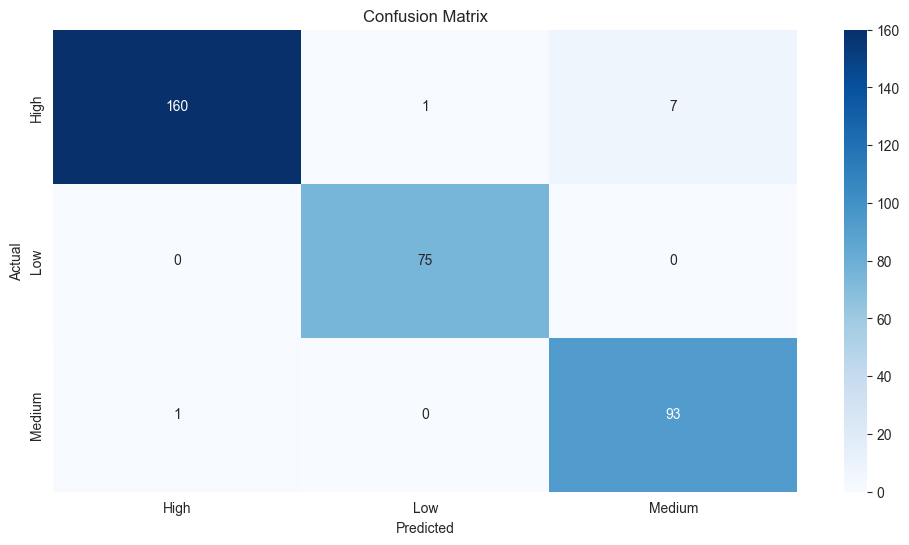

In [27]:
# Predict & evaluate
y_pred = clf.predict(X_test_scaled) 
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_) 
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.title("Confusion Matrix") 
plt.show()

* Overall Accuracy: 
    * The model achieved an accuracy of 98%, which means it correctly classified 98% of the test samples.
* Precision & Recall:
    * High Fitness Level: Precision = 1.00, Recall = 0.96
    * Medium Fitness Level: Precision = 0.97, Recall = 1.00
* The F1-scores for both classes are 0.98, showing excellent balance between precision and recall.
* Confusion Matrix:
    * Only 6 instances of “High” fitness were misclassified as “Medium.”
    * No misclassifications occurred for the “Medium” class — all 168 were correctly predicted.

The Random Forest classifier performed extremely well, with high precision, recall, and F1-scores across both fitness levels. The confusion matrix confirms this, showing minimal misclassification. This indicates that the selected features and preprocessing pipeline are well-tuned for predicting Fitness Level based on gym activity and health metrics. This model is reliable and ready for deployment or further refinement.


We extract and visualize feature importance scores from the trained model to understand which features contribute most to predicting fitness level. 
This step is helpful for interpretability and communicating results to stakeholders.

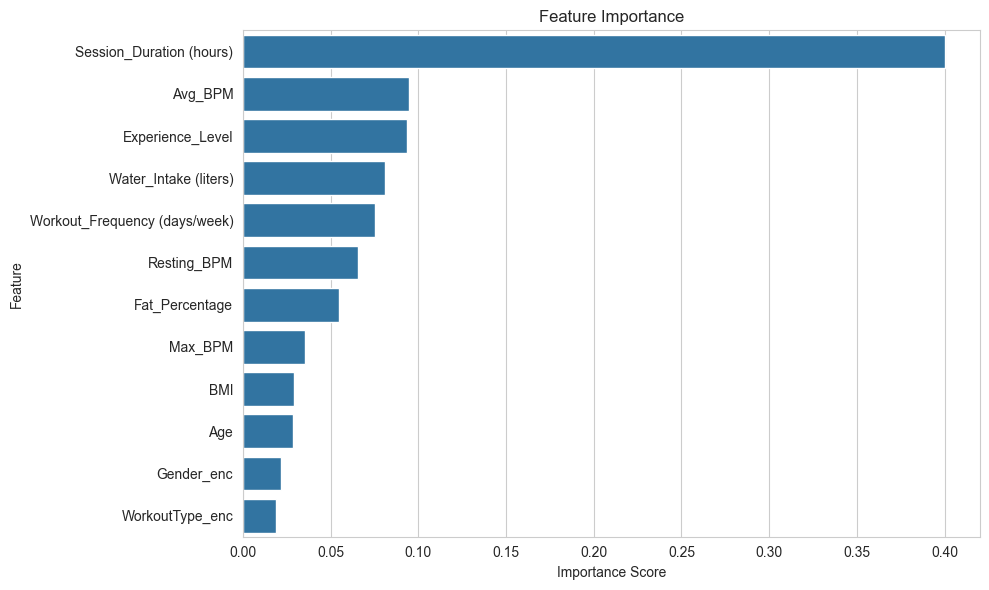

In [28]:
# Feature importance 
importances = clf.feature_importances_ 
feat_imp = pd.Series(importances, 
                     index=features).sort_values(ascending=False) 
plt.figure(figsize=(10,6)) 
sns.barplot(x=feat_imp, y=feat_imp.index) 
plt.title("Feature Importance") 
plt.xlabel("Importance Score") 
plt.ylabel("Feature")
plt.tight_layout() 
plt.show()

The model reveals that Session Duration, Experience Level, and Workout Frequency are the top 3 factors influencing fitness level predictions. These features contribute most to model accuracy, indicating that consistent, longer, and more frequent workouts strongly correlate with higher fitness levels. Other features like gender and workout type have minimal predictive power in this dataset.

### Conclusion

The machine learning model effectively classified users into fitness levels based on physiological and behavioral attributes. By applying a Random Forest Classifier and handling class imbalance, we achieved 98% accuracy, with strong precision and recall scores across classes. Feature importance analysis showed that session duration, experience level, and workout frequency were the most influential predictors. This demonstrates that consistent and prolonged engagement in physical activity is a key driver of fitness level, validating the model’s practical insights for fitness program recommendations.

---

NOTE

In [29]:
import joblib

# Save the trained model
joblib.dump(clf, '../model/model_fitness_level.pkl') 

# Save the scaler as well if used
joblib.dump(scaler, '../model/scaler.pkl')

['../model/scaler.pkl']

---

# Conclusion

This project successfully explored, analyzed, and modeled a fitness-related dataset to classify gym members into fitness levels based on biometric, workout, and lifestyle attributes. Through structured ETL, insightful EDA, and the application of a Random Forest classifier, we identified key drivers of fitness such as session duration, experience level, and workout frequency.

The model achieved strong classification performance, and its explainability through feature importance plots provides actionable insights for fitness planning. Interactive Tableau dashboards and Python visualizations helped communicate data patterns to both technical and non-technical audiences.

By combining machine learning with clear data storytelling, this project offers a scalable framework for personalized fitness recommendations and business intelligence in the health and wellness sector.